# Testy Funkcji

In [263]:

%load_ext autoreload
%autoreload 2

from PVS import PVS
import matplotlib.pyplot as plt

from funcs import *


pvc = PVS()

def get_stats(solutions): 
    print(np.mean(solutions), np.std(solutions))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


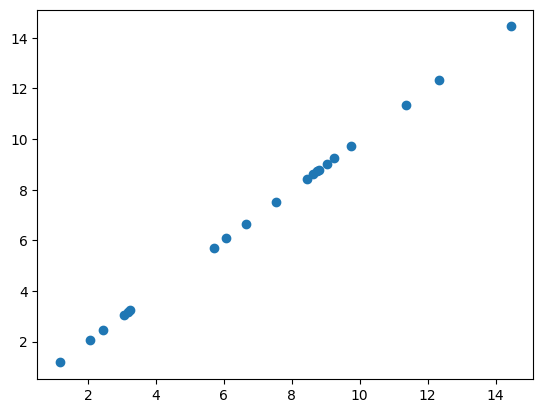

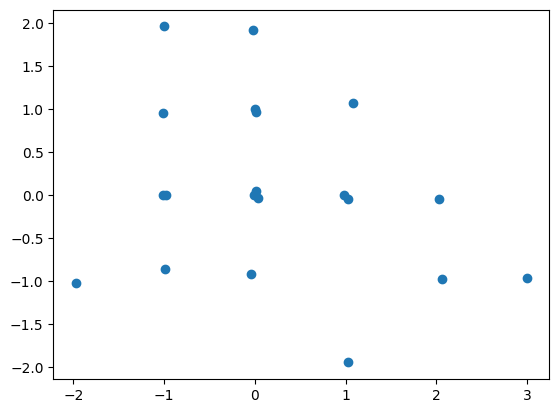

3.5815360975096993 7.093304950457662


In [278]:
from results import Tester

def rastrigin_solver():
    return pvc.solve(rastrigin, 25, 100, 5, -5.12, 5.12)

rastrigin_tester = Tester(rastrigin_solver,20)
rastrigin_tester.draw_y_plot()
rastrigin_tester.draw_2D_x_plot()

print(rastrigin_tester.get_y_std(), rastrigin_tester.get_y_mean())




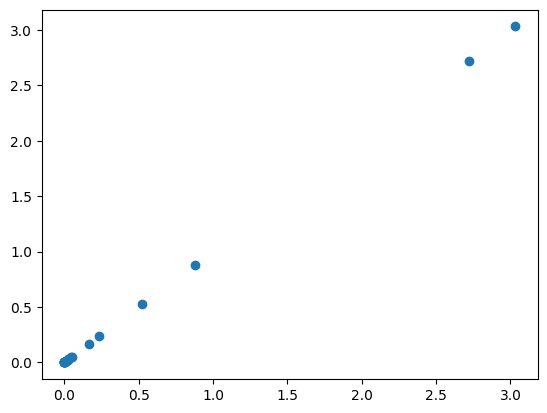

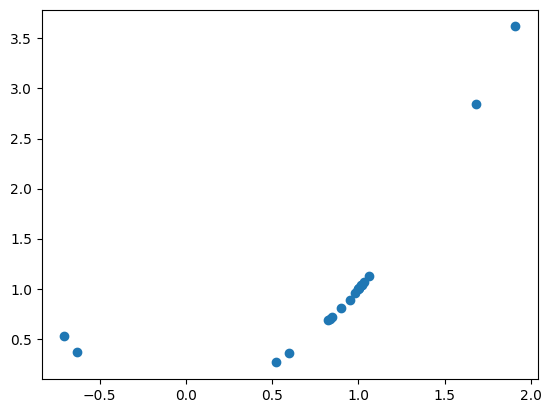

0.8586606259703782 0.38689228180189583


In [273]:


def rosenbrock_solver():
    return pvc.solve(rosenbrock, 15, 30, 2, -10, 10)

rosenbrock_tester = Tester(rosenbrock_solver,20)
rosenbrock_tester.draw_y_plot()
rosenbrock_tester.draw_2D_x_plot()
print(rosenbrock_tester.get_y_std(), rosenbrock_tester.get_y_mean())




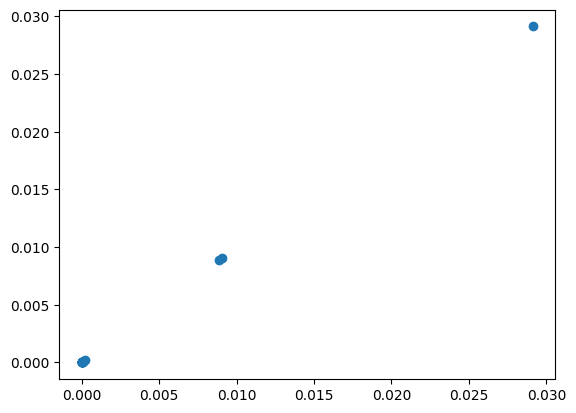

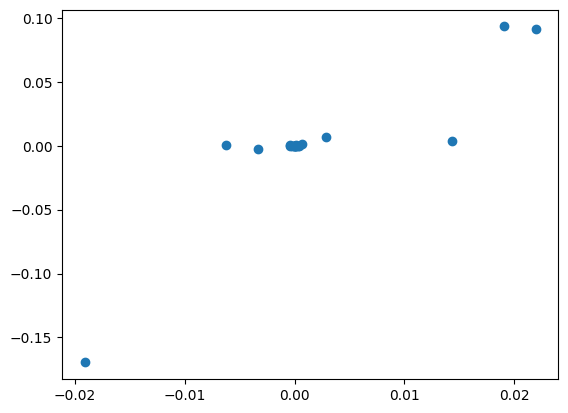

0.006695822874338951 0.002370034413092839


In [266]:

def sphere_solver():
    return pvc.solve(sphere_function, 15, 50, 2, -10, 10)

sphere_tester = Tester(sphere_solver,20)
sphere_tester.draw_y_plot()
sphere_tester.draw_2D_x_plot()
print(sphere_tester.get_y_std(), sphere_tester.get_y_mean())



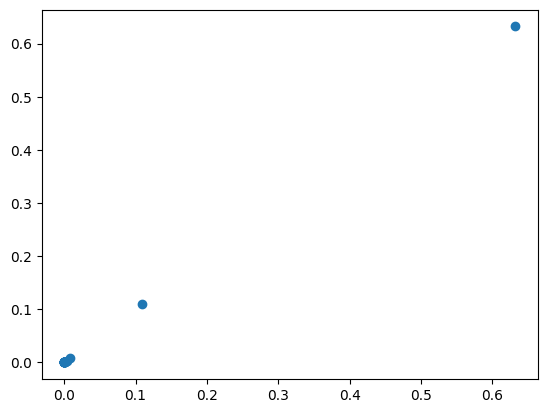

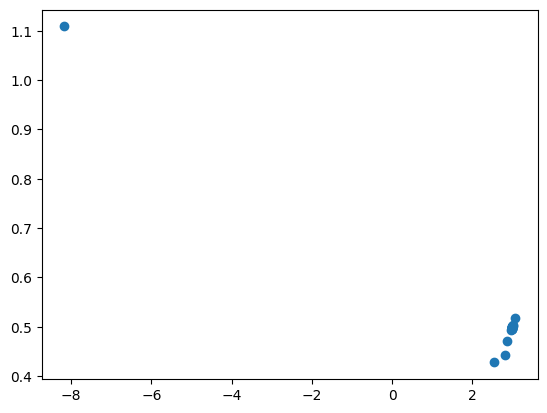

0.13840249149529477 0.037711484456935694


In [267]:

def beale_solver():
    return pvc.solve(beale_function, 15, 50, 2, -4.5, 4.5)

beale_tester = Tester(beale_solver,20)
beale_tester.draw_y_plot()
beale_tester.draw_2D_x_plot()
print(beale_tester.get_y_std(), beale_tester.get_y_mean())



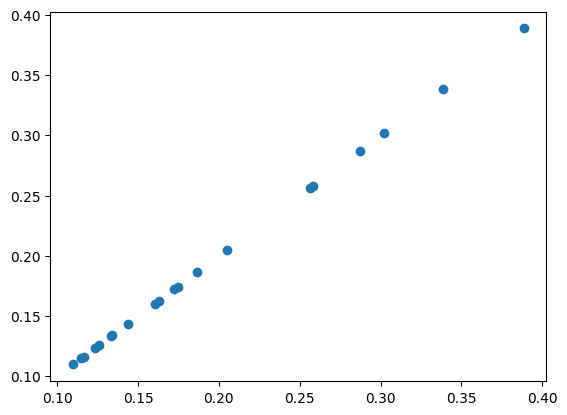

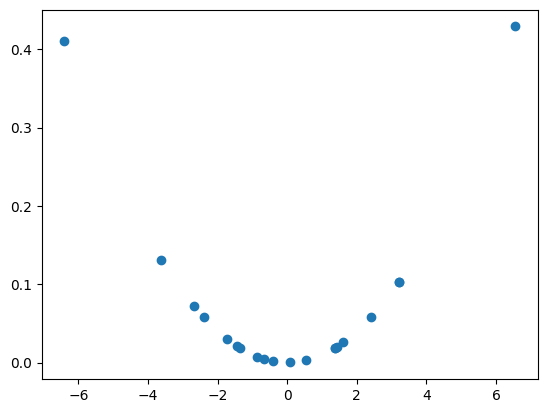

0.08037218570862363 0.1946636237661688


In [269]:

def bukin_solver():
    return pvc.solve(bukin_function_n6, 15, 50, 2, -3, 3)

bukin_tester = Tester(bukin_solver,20)
bukin_tester.draw_y_plot()
bukin_tester.draw_2D_x_plot()
print(bukin_tester.get_y_std(), bukin_tester.get_y_mean())

